In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import numpy as np

In [2]:
data = pd.read_csv("SBER.csv", parse_dates = ["Date"], nrows = 311)
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-03-31,291.02,294.00,294.42,290.26,47.00M,-0.76%
1,2021-03-30,293.25,294.86,295.72,291.50,38.81M,-0.02%
2,2021-03-29,293.30,289.72,294.09,289.26,43.68M,0.71%
3,2021-03-26,291.22,288.63,292.75,288.32,56.07M,1.59%
4,2021-03-25,286.66,286.50,287.03,283.85,35.22M,0.30%


In [3]:
data.describe()

,Date,Price,Open,High,Low
count,311,311.000000,311.000000,311.000000,311.000000
mean,2020-08-17 15:21:24.887459840,234.524019,234.417846,237.314759,231.366141
min,2020-01-03 00:00:00,174.270000,175.000000,182.200000,172.150000
25%,2020-04-25 12:00:00,207.700000,207.215000,209.660000,204.475000
50%,2020-08-19 00:00:00,229.140000,229.080000,231.950000,226.860000
75%,2020-12-07 12:00:00,264.380000,263.885000,267.255000,261.110000
max,2021-03-31 00:00:00,293.300000,294.860000,296.070000,291.500000
std,NaN,32.079847,32.058167,32.075624,32.076603


In [4]:
data["Vol."] = data["Vol."].apply(lambda x : float(x[:-1]))
data["Change %"] = data["Change %"].apply(lambda x : float(x[:-1]))
data.sort_values(by="Date", inplace=True)
data.set_index("Date", inplace=True)
data = data.asfreq('D', method="ffill")

In [5]:
data.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-01-03,255.0,255.99,258.19,253.7,35.85,0.10
2020-01-04,255.0,255.99,258.19,253.7,35.85,0.10
2020-01-05,255.0,255.99,258.19,253.7,35.85,0.10
2020-01-06,253.9,254.75,254.84,251.4,22.35,-0.43
2020-01-07,253.9,254.75,254.84,251.4,22.35,-0.43


In [6]:
data.head(20)

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-01-03,255.00,255.99,258.19,253.70,35.85,0.10
2020-01-04,255.00,255.99,258.19,253.70,35.85,0.10
2020-01-05,255.00,255.99,258.19,253.70,35.85,0.10
2020-01-06,253.90,254.75,254.84,251.40,22.35,-0.43
2020-01-07,253.90,254.75,254.84,251.40,22.35,-0.43
2020-01-08,259.15,253.57,259.15,253.03,40.82,2.07
2020-01-09,257.99,259.40,261.76,257.01,38.33,-0.45
2020-01-10,258.19,257.86,259.25,256.88,18.85,0.08
2020-01-11,258.19,257.86,259.25,256.88,18.85,0.08


In [7]:
train = data[data.index < '2021-01-01']
test = data[data.index >= '2021-01-01']

In [8]:
train

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-01-03,255.00,255.99,258.19,253.70,35.85,0.10
2020-01-04,255.00,255.99,258.19,253.70,35.85,0.10
2020-01-05,255.00,255.99,258.19,253.70,35.85,0.10
2020-01-06,253.90,254.75,254.84,251.40,22.35,-0.43
2020-01-07,253.90,254.75,254.84,251.40,22.35,-0.43
...,...,...,...,...,...,...
2020-12-27,270.64,269.97,271.00,268.28,11.99,0.49
2020-12-28,274.70,270.90,275.19,269.73,39.04,1.50
2020-12-29,272.00,275.91,276.43,271.26,39.02,-0.98


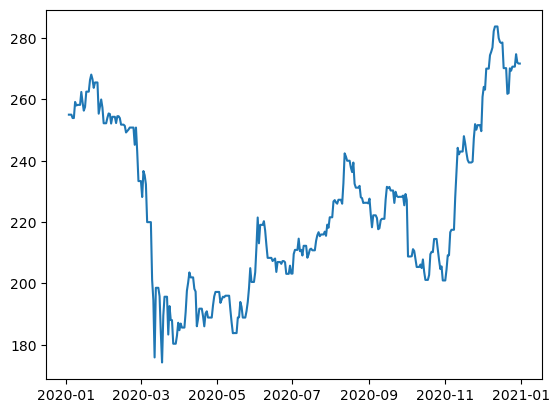

In [9]:
plt.plot(train.Price)

In [10]:
diff = train.Price.diff().dropna()

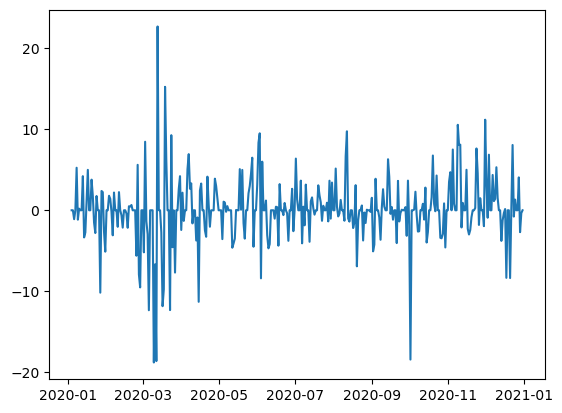

In [11]:
plt.plot(diff)

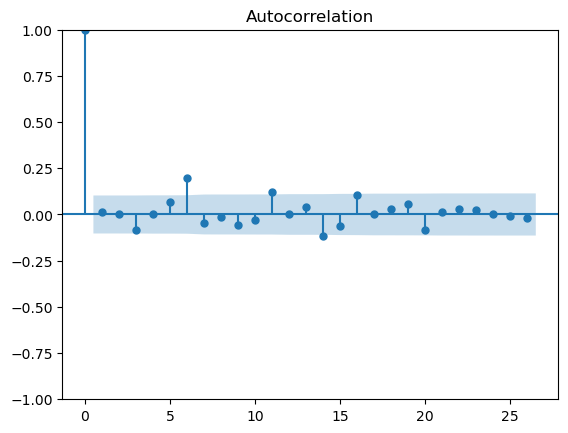

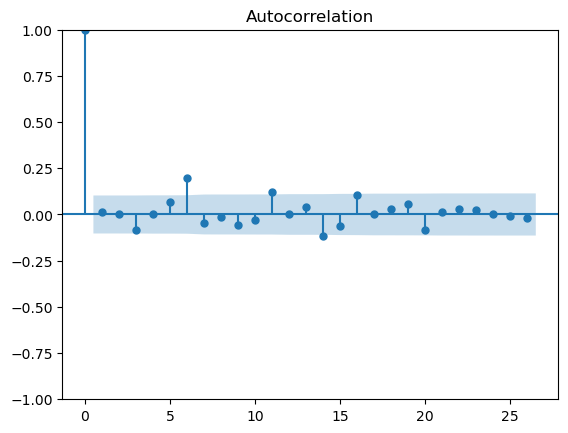

In [12]:
plot_acf(diff)

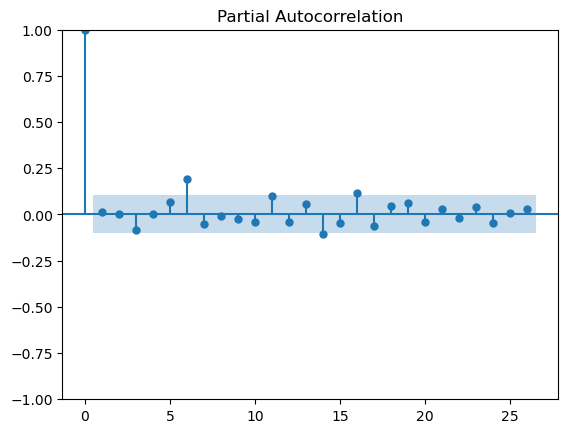

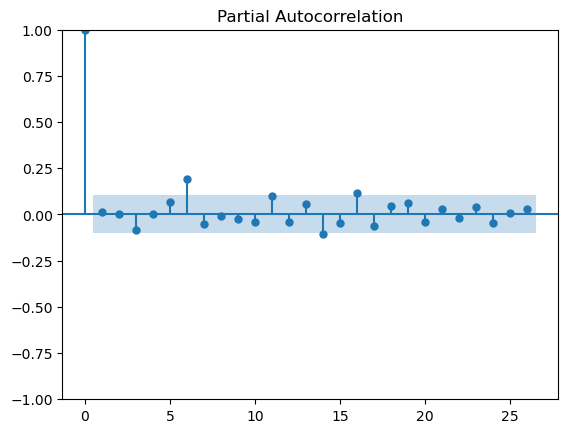

In [13]:
plot_pacf(diff)

In [14]:
from statsmodels.tsa.arima.model import ARIMA

In [15]:
model = ARIMA(train.Price, order = (7, 1, 4))

In [16]:
result = model.fit()

/Users/rohan-testing/miniconda3/envs/arima/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/rohan-testing/miniconda3/envs/arima/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/rohan-testing/miniconda3/envs/arima/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  364
Model:                 ARIMA(7, 1, 4)   Log Likelihood               -1004.073
Date:                Thu, 30 Jan 2025   AIC                           2032.146
Time:                        19:22:22   BIC                           2078.879
Sample:                    01-03-2020   HQIC                          2050.723
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5913      0.131     -4.520      0.000      -0.848      -0.335
ar.L2         -0.3883      0.163     -2.387      0.017      -0.707      -0.069
ar.L3         -0.3867      0.172     -2.246      0.0

<Axes: xlabel='Date'>

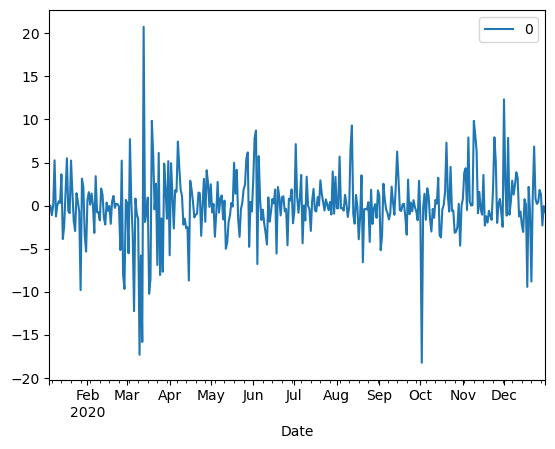

In [18]:
residuals = pd.DataFrame(result.resid[1:])
residuals.plot()

In [19]:
train_predictions = result.predict(start = 1, end = len(train) - 1)

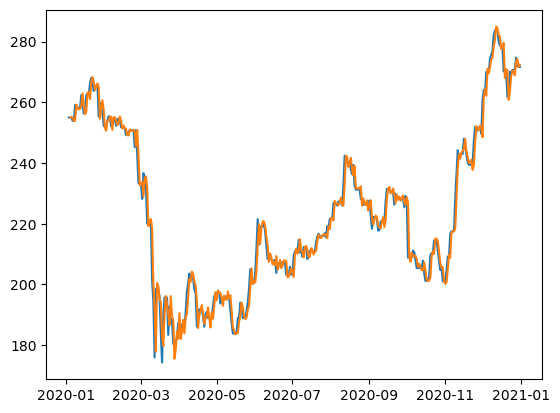

In [20]:
plt.plot(train.Price)
plt.plot(train_predictions)

In [21]:
np.mean(np.abs(train_predictions - train.Price)/np.abs(train.Price))

0.011542055649208127

In [22]:
test_predictions = []
for i in range(len(test)):
    train_data = data.Price.iloc[:len(train) + i]
    model = ARIMA(train_data, order = (7, 1, 4))
    result = model.fit()
    test_predictions.append(float(result.forecast(steps=1)))

/Users/rohan-testing/miniconda3/envs/arima/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/rohan-testing/miniconda3/envs/arima/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/rohan-testing/miniconda3/envs/arima/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/2c/1_dy62d12c725697ykpvzlkw0000gq/T/ipykernel_5594/3752919311.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(

In [23]:
test_predictions

[269.3452403456591,
 273.272591402627,
 272.4427038821173,
 270.6699857603081,
 272.4891622160402,
 273.7412013063898,
 273.32332627686594,
 273.3041890138992,
 281.9611534490915,
 285.2424027432033,
 281.53135195300035,
 289.0633303944609,
 290.3537776686667,
 284.8623371307668,
 284.44419131250345,
 276.76948837389403,
 277.184752606275,
 276.4747144506415,
 279.0877552617705,
 279.06816101403894,
 278.2600881349914,
 275.73270080942694,
 267.49861651412397,
 269.0306623968515,
 268.4597367746374,
 264.3544765855084,
 269.41972124356806,
 264.2566517163883,
 266.91339501651225,
 258.62808857696103,
 258.2536383352659,
 259.86134164743265,
 262.6254156545344,
 263.0968649411495,
 262.39322060752573,
 270.8860135113042,
 272.5473050255634,
 271.86352368817876,
 271.28233975171815,
 274.45363505909427,
 269.8857771894868,
 265.85838941615026,
 264.518548868152,
 266.5317587049125,
 266.0113764210682,
 265.299466452163,
 272.1740098878608,
 270.5387441362751,
 270.8902494217404,
 266.826

In [41]:
train["preds"] = train_predictions
test["preds"] = test_predictions

/var/folders/2c/1_dy62d12c725697ykpvzlkw0000gq/T/ipykernel_5594/2123519973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["preds"] = train_predictions
/var/folders/2c/1_dy62d12c725697ykpvzlkw0000gq/T/ipykernel_5594/2123519973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["preds"] = test_predictions


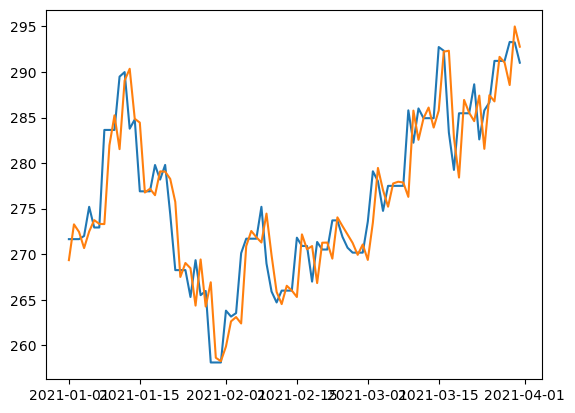

In [25]:
plt.plot(test.Price)
plt.plot(test.preds)

In [26]:
def bollinger_bands(df, n, m):

    TP = df.Price
    data = TP
    sma = pd.Series((data.rolling(n, min_periods=n).mean()), name='B_MA')
    sigma = data.rolling(n, min_periods=n).std() 
    BU = pd.Series((sma + m * sigma), name='BU')
    BL = pd.Series((sma - m * sigma), name='BL')
    df = df.join(sma)
    df = df.join(BU)
    df = df.join(BL)
    
    return df

In [27]:
bb = bollinger_bands(data, 20, 3)

In [28]:
bb = bb.iloc[len(train):]
bb.tail()

,Price,Open,High,Low,Vol.,Change %,B_MA,BU,BL
Date,,,,,,,,,
2021-03-27,291.22,288.63,292.75,288.32,56.07,1.59,285.8270,297.782530,273.871470
2021-03-28,291.22,288.63,292.75,288.32,56.07,1.59,286.5130,297.440420,275.585580
2021-03-29,293.30,289.72,294.09,289.26,43.68,0.71,286.8885,298.705631,275.071369
2021-03-30,293.25,294.86,295.72,291.50,38.81,-0.02,287.4390,299.509929,275.368071
2021-03-31,291.02,294.00,294.42,290.26,47.00,-0.76,287.6900,299.945772,275.434228


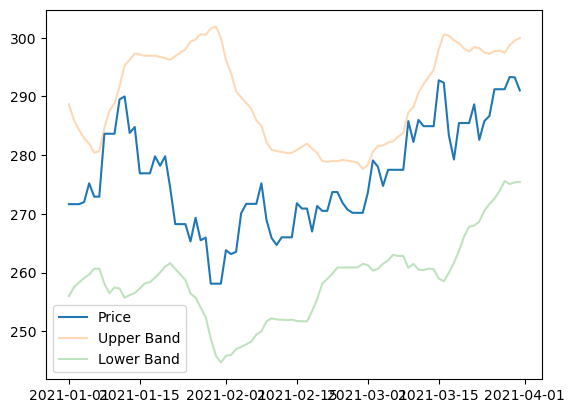

In [29]:
plt.plot(bb['Price'], label = "Price")
plt.plot(bb['BU'], alpha=0.3, label = "Upper Band")
plt.plot(bb['BL'], alpha=0.3, label = "Lower Band")
# plt.plot(bb['B_MA'], alpha=0.3, label = "20 Day SMA")
plt.legend()

In [30]:
def bollinger_bands(df, n, m):

    pred = df.preds
    data = pred
    sma = pd.Series((data.rolling(n, min_periods=n).mean()), name='B_MA')
    sigma = data.rolling(n, min_periods=n).std() 
    BU = pd.Series((sma + m * sigma), name='BU')
    BL = pd.Series((sma - m * sigma), name='BL')
    signals = []
    for i in range(len(pred)):
        if pred[i] >= BU[i]:
            signals.append(-1)
        elif pred[i] <= BL[i]:
            signals.append(1)
        else:
            signals.append(0)
    df["signal"] = signals
    df["BU"] =BU
    df["BL"] = BL
    return df

In [42]:
train_bb = bollinger_bands(train, 10, 1)
test_bb = bollinger_bands(test, 10, 1)

/var/folders/2c/1_dy62d12c725697ykpvzlkw0000gq/T/ipykernel_5594/638003130.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pred[i] >= BU[i]:
/var/folders/2c/1_dy62d12c725697ykpvzlkw0000gq/T/ipykernel_5594/638003130.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif pred[i] <= BL[i]:
/var/folders/2c/1_dy62d12c725697ykpvzlkw0000gq/T/ipykernel_5594/638003130.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [32]:
test_bb

,Price,Open,High,Low,Vol.,Change %,preds,signal,BU,BL
Date,,,,,,,,,,
2021-01-01,271.65,272.49,274.24,270.12,31.53,-0.13,269.345240,0,NaN,NaN
2021-01-02,271.65,272.49,274.24,270.12,31.53,-0.13,273.272591,0,NaN,NaN
2021-01-03,271.65,272.49,274.24,270.12,31.53,-0.13,272.442704,0,NaN,NaN
2021-01-04,272.00,274.67,276.60,270.61,48.92,0.13,270.669986,0,NaN,NaN
2021-01-05,275.20,272.69,275.70,270.28,45.58,1.18,272.489162,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-03-27,291.22,288.63,292.75,288.32,56.07,1.59,291.663762,-1,289.004610,281.621897
2021-03-28,291.22,288.63,292.75,288.32,56.07,1.59,291.028980,-1,290.111351,282.162403
2021-03-29,293.30,289.72,294.09,289.26,43.68,0.71,288.570684,0,290.098655,284.206711


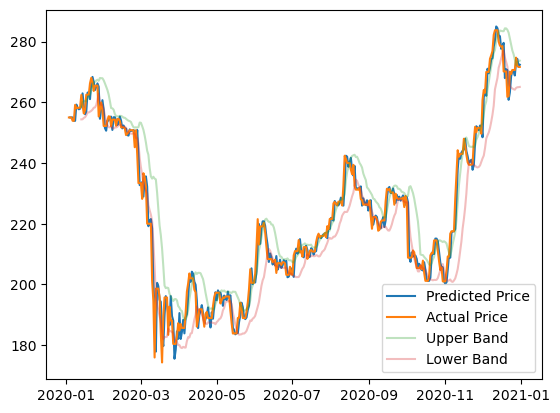

In [44]:
plt.plot(train_bb['preds'], label = "Predicted Price")
plt.plot(train_bb['Price'], label = "Actual Price")
plt.plot(train_bb['BU'], alpha=0.3, label = "Upper Band")
plt.plot(train_bb['BL'], alpha=0.3, label = "Lower Band")
plt.legend()

In [46]:
test_bb.head(16)

,Price,Open,High,Low,Vol.,Change %,preds,signal,BU,BL
Date,,,,,,,,,,
2021-01-01,271.65,272.49,274.24,270.12,31.53,-0.13,269.345240,0,NaN,NaN
2021-01-02,271.65,272.49,274.24,270.12,31.53,-0.13,273.272591,0,NaN,NaN
2021-01-03,271.65,272.49,274.24,270.12,31.53,-0.13,272.442704,0,NaN,NaN
2021-01-04,272.00,274.67,276.60,270.61,48.92,0.13,270.669986,0,NaN,NaN
2021-01-05,275.20,272.69,275.70,270.28,45.58,1.18,272.489162,0,NaN,NaN
2021-01-06,272.93,275.94,275.94,271.62,40.95,-0.82,273.741201,0,NaN,NaN
2021-01-07,272.93,275.94,275.94,271.62,40.95,-0.82,273.323326,0,NaN,NaN
2021-01-08,283.64,275.11,283.99,275.11,88.93,3.92,273.304189,0,NaN,NaN
2021-01-09,283.64,275.11,283.99,275.11,88.93,3.92,281.961153,0,NaN,NaN


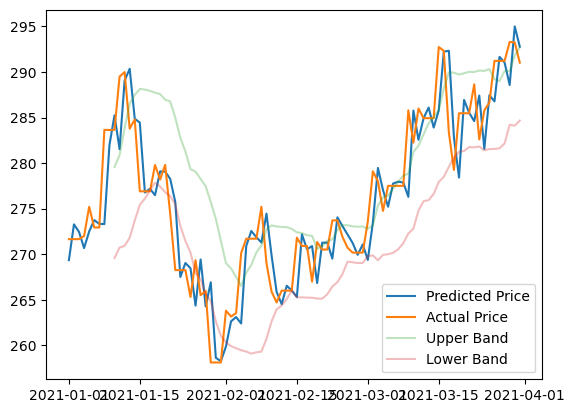

In [33]:
plt.plot(test_bb['preds'], label = "Predicted Price")
plt.plot(test_bb['Price'], label = "Actual Price")
plt.plot(test_bb['BU'], alpha=0.3, label = "Upper Band")
plt.plot(test_bb['BL'], alpha=0.3, label = "Lower Band")
plt.legend()

In [34]:
capital = 1000
stocks = 0
for _, row in test_bb.iterrows():
    if row.signal == 1:
        # buy
        tobuy = capital / row.Price
        print(f"Buying {tobuy} shares at {row.Price}")
        stocks += tobuy
        capital -= row.Price * tobuy
    elif row.signal == -1:
        if stocks > 0:
            print(f"Selling {stocks} shares at {row.Price}")
            capital += row.Price * stocks
            stocks = 0
final_stock_price = test_bb.iloc[-1].Price
capital += final_stock_price * stocks
print("------------")
print(f"Net profit: ${round(capital - 1000, 2)}")

Buying 3.5741091532935414 shares at 279.79
Buying 0.0 shares at 268.25
Buying 0.0 shares at 268.25
Buying 0.0 shares at 265.3
Buying 0.0 shares at 269.34
Buying 0.0 shares at 265.96
Buying 0.0 shares at 258.11
Buying 0.0 shares at 258.11
Buying 0.0 shares at 263.8
Selling 3.5741091532935414 shares at 271.7
Buying 3.549548420753912 shares at 273.58
Selling 3.549548420753912 shares at 279.1
Buying 3.470343518521795 shares at 285.47
Selling 3.470343518521795 shares at 291.22
------------
Net profit: $10.63


In [35]:
# Extend b bands backwards using full data
# Use all capital in buy/sell

In [47]:
train

,Price,Open,High,Low,Vol.,Change %,preds,signal,BU,BL
Date,,,,,,,,,,
2020-01-03,255.00,255.99,258.19,253.70,35.85,0.10,NaN,0,NaN,NaN
2020-01-04,255.00,255.99,258.19,253.70,35.85,0.10,255.000003,0,NaN,NaN
2020-01-05,255.00,255.99,258.19,253.70,35.85,0.10,255.000041,0,NaN,NaN
2020-01-06,253.90,254.75,254.84,251.40,22.35,-0.43,254.999693,0,NaN,NaN
2020-01-07,253.90,254.75,254.84,251.40,22.35,-0.43,253.898359,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-12-27,270.64,269.97,271.00,268.28,11.99,0.49,268.820699,0,274.094393,264.139531
2020-12-28,274.70,270.90,275.19,269.73,39.04,1.50,273.395322,-1,272.266808,264.728965
2020-12-29,272.00,275.91,276.43,271.26,39.02,-0.98,274.303686,-1,273.310494,264.949499


In [48]:
test

,Price,Open,High,Low,Vol.,Change %,preds,signal,BU,BL
Date,,,,,,,,,,
2021-01-01,271.65,272.49,274.24,270.12,31.53,-0.13,269.345240,0,NaN,NaN
2021-01-02,271.65,272.49,274.24,270.12,31.53,-0.13,273.272591,0,NaN,NaN
2021-01-03,271.65,272.49,274.24,270.12,31.53,-0.13,272.442704,0,NaN,NaN
2021-01-04,272.00,274.67,276.60,270.61,48.92,0.13,270.669986,0,NaN,NaN
2021-01-05,275.20,272.69,275.70,270.28,45.58,1.18,272.489162,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-03-27,291.22,288.63,292.75,288.32,56.07,1.59,291.663762,-1,289.004610,281.621897
2021-03-28,291.22,288.63,292.75,288.32,56.07,1.59,291.028980,-1,290.111351,282.162403
2021-03-29,293.30,289.72,294.09,289.26,43.68,0.71,288.570684,0,290.098655,284.206711


,Price,Open,High,Low,Vol.,Change %,preds,signal,BU,BL
Date,,,,,,,,,,
2020-01-03,255.00,255.99,258.19,253.70,35.85,0.10,NaN,0,NaN,NaN
2020-01-04,255.00,255.99,258.19,253.70,35.85,0.10,255.000003,0,NaN,NaN
2020-01-05,255.00,255.99,258.19,253.70,35.85,0.10,255.000041,0,NaN,NaN
2020-01-06,253.90,254.75,254.84,251.40,22.35,-0.43,254.999693,0,NaN,NaN
2020-01-07,253.90,254.75,254.84,251.40,22.35,-0.43,253.898359,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-03-27,291.22,288.63,292.75,288.32,56.07,1.59,291.663762,-1,289.004610,281.621897
2021-03-28,291.22,288.63,292.75,288.32,56.07,1.59,291.028980,-1,290.111351,282.162403
2021-03-29,293.30,289.72,294.09,289.26,43.68,0.71,288.570684,0,290.098655,284.206711
